In [1]:
import numpy as np 
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('../input/data-scientist-job-market-in-the-us/alldata.csv')
df.head(2)

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"


In [3]:
def job_describe(n, df=df):
    print ('Position:',df.iloc[n]['position'])
    print('---------------')
    print(df.iloc[n]['description'])
    
job_describe(7)

Position: Junior to Mid-level Engineer, Geologist or Environmental Scientist
---------------
Overview / Responsibilities
Wood Environment &amp; Infrastructure Solutions has an immediate need for a Junior to Mid-level Engineer, Geologist or Environmental Scientist. The position will support the Remediation Project Managers. The candidate should be eager to learn and be able to follow specific instructions to execute field tasks safely, accurately and timely.

Key Responsibilities
The successful candidate will work on a variety of site investigation / remediation / demolition projects at industrial / commercial sites and / or government installations and conduct site assessment for real estate transactions. Duties will include performing routine, well-defined field and office assignments (technical and non-technical) including planning, conducting, and reporting on field investigations and remediation. Work may be conducted under a variety of regulatory programs (CERCLA, RCRA, UST, Brown

In [4]:
df.dropna(axis=0,subset=['description'],inplace=True)

In [5]:
def extract_state (s):
    return s.split(',')[1].split(' ')[1]

df['state']=df['location'].apply(extract_state)

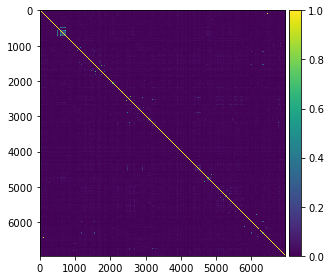

In [6]:
vectorizer=TfidfVectorizer(analyzer='word',
                           stop_words='english',ngram_range=(1,3),min_df=0)
vectors=vectorizer.fit_transform(df['description'])

kernel=linear_kernel(vectors,vectors)
#Sanity check. A dark square with an orange diagonal line is what you'd expect.
import matplotlib.pyplot as plt
from skimage.io import imshow

imshow(kernel)
plt.show()